In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils import get_vectors

In [7]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

In [8]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    X_demeaned = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    
    # sort the eigenvalue in increasing order (get indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    idx_sorted_decreasing = idx_sorted[::-1]
    
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    eigen_vecs_sorted = eigen_vecs[idx_sorted_decreasing]
    
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]
    
    X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T
    
    return X_reduced

In [9]:
# Testing the function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Original matrix was " + str(X.shape) + "and it became:")
print(X_reduced)

Original matrix was (3, 10)and it became:
[[-0.11680068  0.24526651]
 [-0.08611395 -0.33985161]
 [ 0.20291463  0.09458509]]


In [10]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
        'village', 'country', 'continent', 'petroleum', 'joyful']

X = get_vectors(word_embeddings, words)

print('We have 11 words each of 300 dimensions thus X.shape is:', X.shape)

We have 11 words each of 300 dimensions thus X.shape is: (11, 300)


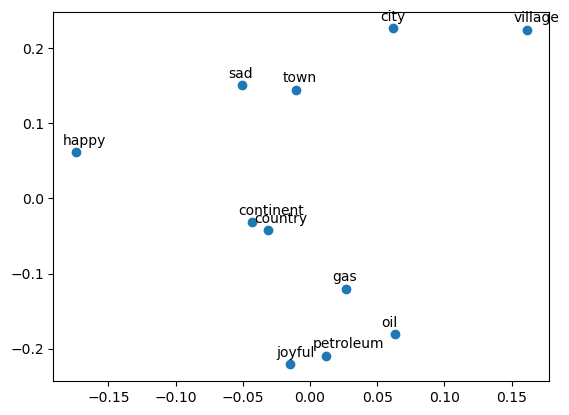

In [13]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.01, result[i, 1] + 0.01))
plt.show()